# Homework 5 RF Accuracy Improvement

This assignment is inspired by examples of Shan-Hung Wu from National Tsing Hua University.

Requirement: improve the accuracy per feature of the following code from 0.03 up to at least 0.40 and accuracy should be more than 0.92

Here are three hints:

    You can improve the ratio by picking out or "creating" several features.
    Tune hyperparameters
    The ratio can be improved from 0.03 up to 0.47.

(569, 30)
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best hyperparameter values: {'bootstrap': True, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 20}
Accuracy score, training dataset: 0.9671361502347418
Accuracy score, test dataset: 0.9370629370629371
Average, training dataset: 0.048356807511737085
Average, test dataset: 0.04685314685314686


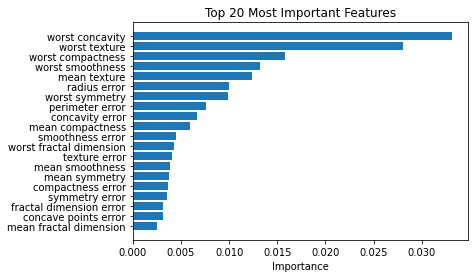

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load the breast_cancer dataset
init_data = load_breast_cancer()
breast_cancer_data = load_breast_cancer()
(X,y) = breast_cancer_data.data,breast_cancer_data.target

print(X.shape)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Look at the feature importance and select the top 20 most important features to use
sorted_feature_indices = rf.feature_importances_.argsort()[0:20]
plt.barh(breast_cancer_data.feature_names[sorted_feature_indices], rf.feature_importances_[sorted_feature_indices])
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features')

# Pull out only the most important feature data from the X data
filtered_x_train = x_train[:,sorted_feature_indices]
filtered_x_test = x_test[:,sorted_feature_indices]

# Tune some hyperparameters using Grid Search CV
# Note: some values that were tested caused a "non-infinite test scores" warning
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth = np.arange(1,5)
min_samples_split = [2,3]
bootstrap = [True, False]
hyperparams = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

rf_grid_search = GridSearchCV(estimator = rf, param_grid = hyperparams, cv = 5, verbose=2, n_jobs = 10)
rf_grid_search.fit(filtered_x_train,y_train)

accuracy_training_data = rf_grid_search.score(filtered_x_train,y_train)
accuracy_test_data = rf_grid_search.score(filtered_x_test,y_test)

print('Best hyperparameter values: ' + repr(rf_grid_search.best_params_))
print('Accuracy score, training dataset: ' + repr(accuracy_training_data))
print('Accuracy score, test dataset: ' + repr(accuracy_test_data))
print('Average, training dataset: ' + repr(accuracy_training_data/20))
print('Average, test dataset: ' + repr(accuracy_test_data/20))